<a href="https://colab.research.google.com/github/SaulVid/mat421sv/blob/main/Ordinary_Differential_Equation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

22.4


<ipython-input-23-4ebc34aa6d4f>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


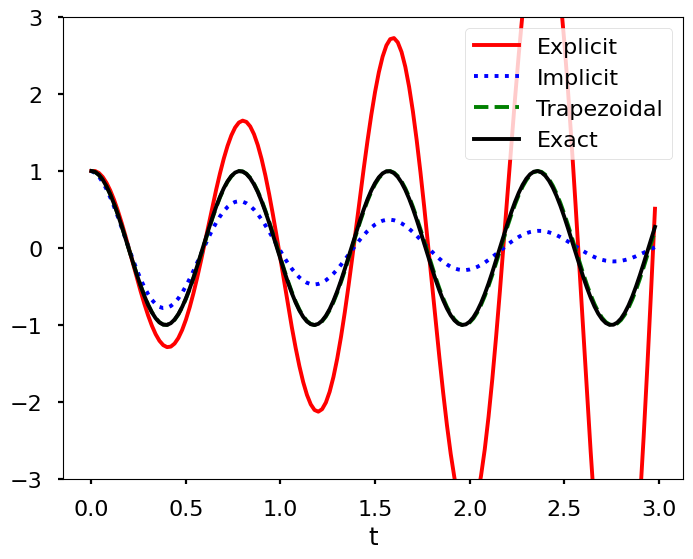

In [23]:
import numpy as np
from numpy.linalg import inv
import math
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

h = 0.02
t = np.arange(0, 3.0, h)
w = 8
s0 = np.array([[1], [0]])
a = np.array([[1, h], [-w**2*h, 1]])
b = inv(np.array([[1, -h], [w**2*h, 1]]))
c = np.dot(inv(np.array([[1, -h/2], [w**2*h/2,1]])), np.array([[1,h/2], [-w**2*h/2, 1]]))
d = np.zeros((len(t), 2))
e = np.zeros((len(t), 2))
g= np.zeros((len(t), 2))

d[0, :] = s0.T
e[0, :] = s0.T
g[0, :] = s0.T

for j in range(0, len(t)-1):
    d[j+1, :] = np.dot(a,d[j, :])
    e[j+1, :] = np.dot(b ,e[j, :])
    g[j+1, :] = np.dot(c,g[j, :])
    
plt.figure(figsize = (8, 6))
plt.plot(t,d[:,0],'r-')
plt.plot(t,e[:,0],'b:')
plt.plot(t,g[:,0],'g--')
plt.plot(t, np.cos(w*t), 'k')
plt.ylim([-3, 3])
plt.xlabel('t')
plt.ylabel('')
plt.legend(['Explicit', 'Implicit', 'Trapezoidal', 'Exact'])
plt.show()

22.5
Runge Kutta Methods

0.500000 	 2.260437 	 2.083711
1.000000 	 3.166971 	 4.664914
1.500000 	 5.064093 	 8.051408
2.000000 	 8.238942 	 11.491648
2.500000 	 12.106942 	 12.245668
3.000000 	 14.623226 	 8.063630
3.500000 	 13.860901 	 2.137829
4.000000 	 10.445942 	 0.094485
4.500000 	 6.709067 	 2.441685
5.000000 	 4.092949 	 6.075172


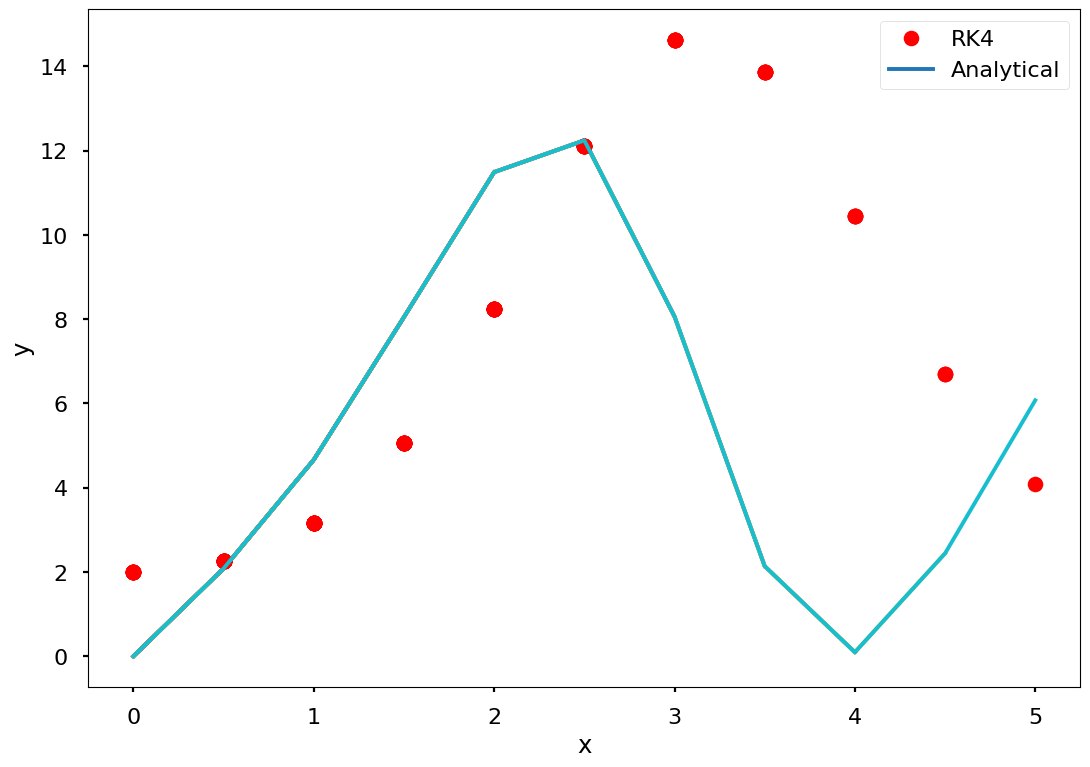

In [17]:
import math

dy = lambda x,y: math.sin(x)*y
f = lambda x: math.sin(x)*y+x*2

xi = 0; xf = 5; h = 0.5
n = int((xf-xi)/h)
x = 0; y=2

x_plot = []; y_RK4 = []; y_analytical = []

for i in range (1,n+1):
  x_plot.append(x); y_RK4.append(y); y_analytical.append(f(x))
  k1 = dy(x,y)
  k2 = dy(x+h/2, y+ +k1 *h/2)
  k3 = dy(x+h/2, y+ k2*h/2)
  k4 = dy(x+h, y + k3*h)

  y = y+1/6*(k1+2*k2+2*k3+k4)*h
  x = x+h

  print('%f \t %f \t %f'%(x,y,f(x)))

  x_plot.append(x); y_RK4.append(y); y_analytical.append(f(x))
  plt.plot(x_plot,y_RK4,'ro',x_plot,y_analytical)
  plt.xlabel('x'); plt.ylabel('y')
  plt.legend(["RK4", 'Analytical'])

Python ODE solvers


array([0.89619226])

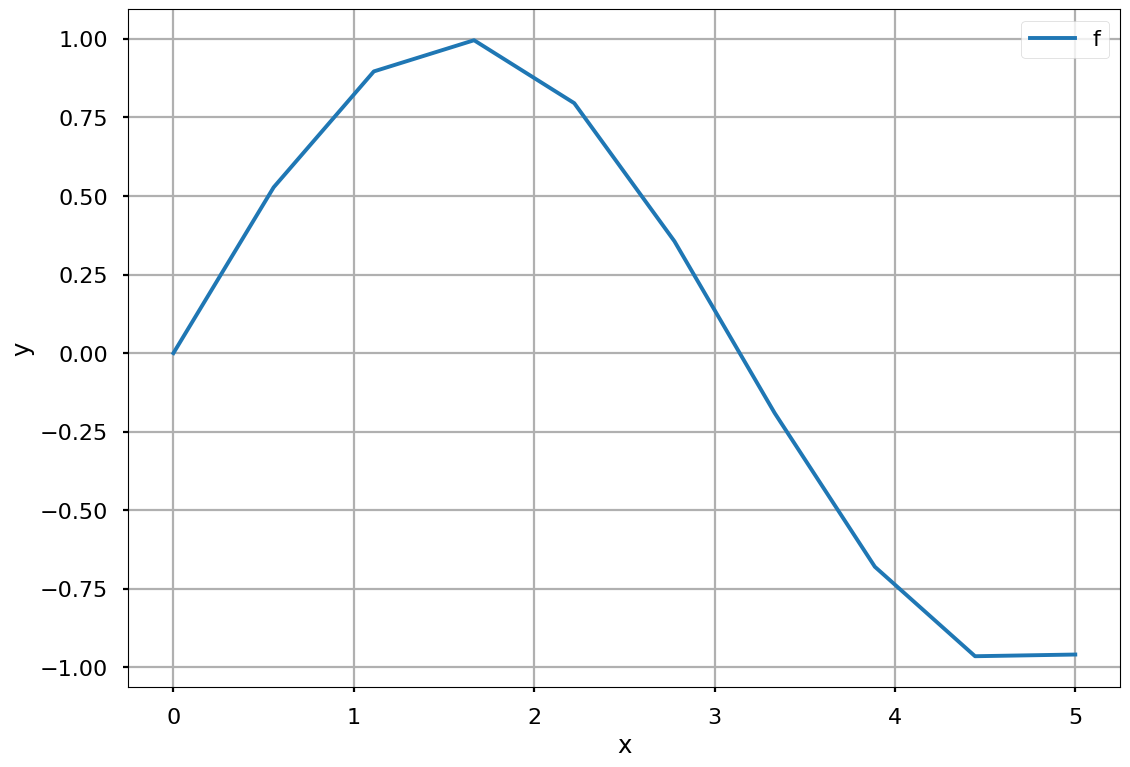

In [50]:
import scipy as sp
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

def diffeq(y,x):
  dydx= math.cos(x)
  return dydx
x=np.linspace(0,5,10)
y=odeint(diffeq,0,x)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x,y)
plt.grid()
plt.legend('f(x)')


#y value at any given x
#y[x]
y[2]
